In [78]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure
import numpy as np

In [2]:
pd.set_option('display.max_rows', 500)

In [3]:
pd.set_option('display.max_columns', 500)

In [4]:
men_vs_women = pd.read_csv('../data/obesity-in-men-vs-obesity-in-women.csv')

In [5]:
men_vs_women

Entity      Code  Year  \
0          Abkhazia  OWID_ABK  2015   
1       Afghanistan       AFG  1975   
2       Afghanistan       AFG  1976   
3       Afghanistan       AFG  1977   
4       Afghanistan       AFG  1978   
...             ...       ...   ...   
8573       Zimbabwe       ZWE  2013   
8574       Zimbabwe       ZWE  2014   
8575       Zimbabwe       ZWE  2015   
8576       Zimbabwe       ZWE  2016   
8577  Åland Islands       ALA  2015   

      Indicator:Prevalence of obesity among adults, BMI &GreaterEqual; 30 (age-standardized estimate) (%) - Sex:Male  \
0                                                   NaN                                                                
1                                                   0.2                                                                
2                                                   0.2                                                                
3                                                   0.2                                                                
4                                                   0.2                                                                
...                                                 ...                                                                
8573                                                4.2                                                                
8574                                                4.4                                                                
8575                                                4.5                                                                
8576                                                4.7                                                                
8577                                                NaN                                                                

      Indicator:Prevalence of obesity among adults, BMI &GreaterEqual; 30 (age-standardized estimate) (%) - Sex:Female  \
0                                                   NaN                                                                  
1                                                   0.8                                                                  
2                                                   0.8                                                                  
3                                                   0.9                                                                  
4                                                   0.9                                                                  
...                                                 ...                                                                  
8573                                               23.9                                                                  
8574                                               24.4                                                                  
8575                                               24.8                                                                  
8576                                               25.3                                                                  
8577                                                NaN                                                                  

     Continent  
0         Asia  
1          NaN  
2          NaN  
3          NaN  
4          NaN  
...        ...  
8573       NaN  
8574       NaN  
8575    Africa  
8576       NaN  
8577    Europe  

[8578 rows x 6 columns]

In [6]:
men_vs_women.isna().sum()

Entity                                                                                                                 0
Code                                                                                                                 420
Year                                                                                                                   0
Indicator:Prevalence of obesity among adults, BMI &GreaterEqual; 30 (age-standardized estimate) (%) - Sex:Male        94
Indicator:Prevalence of obesity among adults, BMI &GreaterEqual; 30 (age-standardized estimate) (%) - Sex:Female      94
Continent                                                                                                           8293
dtype: int64

### Renaming columns to make them more understandable.

In [7]:
men_vs_women.rename(columns={'Indicator:Prevalence of obesity among adults, BMI &GreaterEqual; 30 (age-standardized estimate) (%) - Sex:Male': '% of men w/BMI of 30kg/m2 or higher','Indicator:Prevalence of obesity among adults, BMI &GreaterEqual; 30 (age-standardized estimate) (%) - Sex:Female':'% of women w/BMI of 30kg/m2 or higher'}, inplace=True)

In [8]:
men_vs_women

Entity      Code  Year  % of men w/BMI of 30kg/m2 or higher  \
0          Abkhazia  OWID_ABK  2015                                  NaN   
1       Afghanistan       AFG  1975                                  0.2   
2       Afghanistan       AFG  1976                                  0.2   
3       Afghanistan       AFG  1977                                  0.2   
4       Afghanistan       AFG  1978                                  0.2   
...             ...       ...   ...                                  ...   
8573       Zimbabwe       ZWE  2013                                  4.2   
8574       Zimbabwe       ZWE  2014                                  4.4   
8575       Zimbabwe       ZWE  2015                                  4.5   
8576       Zimbabwe       ZWE  2016                                  4.7   
8577  Åland Islands       ALA  2015                                  NaN   

      % of women w/BMI of 30kg/m2 or higher Continent  
0                                       NaN      Asia  
1                                       0.8       NaN  
2                                       0.8       NaN  
3                                       0.9       NaN  
4                                       0.9       NaN  
...                                     ...       ...  
8573                                   23.9       NaN  
8574                                   24.4       NaN  
8575                                   24.8    Africa  
8576                                   25.3       NaN  
8577                                    NaN    Europe  

[8578 rows x 6 columns]

### Dropped the "Continent" column because it was almost all NaN's.

In [9]:
men_vs_women

Entity      Code  Year  % of men w/BMI of 30kg/m2 or higher  \
0          Abkhazia  OWID_ABK  2015                                  NaN   
1       Afghanistan       AFG  1975                                  0.2   
2       Afghanistan       AFG  1976                                  0.2   
3       Afghanistan       AFG  1977                                  0.2   
4       Afghanistan       AFG  1978                                  0.2   
...             ...       ...   ...                                  ...   
8573       Zimbabwe       ZWE  2013                                  4.2   
8574       Zimbabwe       ZWE  2014                                  4.4   
8575       Zimbabwe       ZWE  2015                                  4.5   
8576       Zimbabwe       ZWE  2016                                  4.7   
8577  Åland Islands       ALA  2015                                  NaN   

      % of women w/BMI of 30kg/m2 or higher Continent  
0                                       NaN      Asia  
1                                       0.8       NaN  
2                                       0.8       NaN  
3                                       0.9       NaN  
4                                       0.9       NaN  
...                                     ...       ...  
8573                                   23.9       NaN  
8574                                   24.4       NaN  
8575                                   24.8    Africa  
8576                                   25.3       NaN  
8577                                    NaN    Europe  

[8578 rows x 6 columns]

### Reduced the data to the most recent 30 year term to get a clearer window.

In [10]:
m_vs_w_25=men_vs_women[men_vs_women['Year']>= 1986]
m_vs_w_25

Entity      Code  Year  % of men w/BMI of 30kg/m2 or higher  \
0          Abkhazia  OWID_ABK  2015                                  NaN   
12      Afghanistan       AFG  1986                                  0.4   
13      Afghanistan       AFG  1987                                  0.5   
14      Afghanistan       AFG  1988                                  0.5   
15      Afghanistan       AFG  1989                                  0.6   
...             ...       ...   ...                                  ...   
8573       Zimbabwe       ZWE  2013                                  4.2   
8574       Zimbabwe       ZWE  2014                                  4.4   
8575       Zimbabwe       ZWE  2015                                  4.5   
8576       Zimbabwe       ZWE  2016                                  4.7   
8577  Åland Islands       ALA  2015                                  NaN   

      % of women w/BMI of 30kg/m2 or higher Continent  
0                                       NaN      Asia  
12                                      1.5       NaN  
13                                      1.6       NaN  
14                                      1.7       NaN  
15                                      1.8       NaN  
...                                     ...       ...  
8573                                   23.9       NaN  
8574                                   24.4       NaN  
8575                                   24.8    Africa  
8576                                   25.3       NaN  
8577                                    NaN    Europe  

[6356 rows x 6 columns]

### Average women BMI by Entity (Descending)

In [11]:
avg_women_by_country=men_vs_women.groupby('Entity')['% of women w/BMI of 30kg/m2 or higher'].mean().reset_index()
#avg_women_by_country.sort_values(ascending=False)
avg_women_by_country=pd.DataFrame(avg_women_by_country)
avg_women_by_country

Entity  \
0                                        Abkhazia   
1                                     Afghanistan   
2                                          Africa   
3                           Akrotiri and Dhekelia   
4                                         Albania   
5                                         Algeria   
6                                  American Samoa   
7                                        Americas   
8                                         Andorra   
9                                          Angola   
10                                       Anguilla   
11                                     Antarctica   
12                            Antigua and Barbuda   
13                                      Argentina   
14                                        Armenia   
15                                          Aruba   
16                                      Australia   
17                                        Austria   
18                                Austria-Hungary   
19                                     Azerbaijan   
20                                          Baden   
21                                        Bahamas   
22                                        Bahrain   
23                                     Bangladesh   
24                                       Barbados   
25                                        Bavaria   
26                                        Belarus   
27                                        Belgium   
28                                         Belize   
29                                          Benin   
30                                        Bermuda   
31                                         Bhutan   
32                                        Bolivia   
33                Bonaire Sint Eustatius and Saba   
34                         Bosnia and Herzegovina   
35                                       Botswana   
36                                  Bouvet Island   
37                                         Brazil   
38                 British Indian Ocean Territory   
39                         British Virgin Islands   
40                                         Brunei   
41                                       Bulgaria   
42                                   Burkina Faso   
43                                        Burundi   
44                                       Cambodia   
45                                       Cameroon   
46                                         Canada   
47                                     Cape Verde   
48                                 Cayman Islands   
49                       Central African Republic   
50                                           Chad   
51                                Channel Islands   
52                                          Chile   
53                                          China   
54                               Christmas Island   
55                                  Cocos Islands   
56                                       Colombia   
57                                        Comoros   
58                                          Congo   
59                                   Cook Islands   
60                                     Costa Rica   
61                                  Cote d'Ivoire   
62                                        Croatia   
63                                           Cuba   
64                                        Curacao   
65                                         Cyprus   
66                                        Czechia   
67                                 Czechoslovakia   
68                   Democratic Republic of Congo   
69                                        Denmark   
70                                       Djibouti   
71                                       Dominica   
72                             Dominican Republic   
73                                   East Germany   
74                          Eastern Mediterranean   
75             

In [12]:
avg_women_by_country=avg_women_by_country.dropna()
avg_women_by_country

Entity  % of women w/BMI of 30kg/m2 or higher
1                         Afghanistan                               3.190476
2                              Africa                               8.304762
4                             Albania                              13.959524
5                             Algeria                              21.838095
7                            Americas                              20.685714
8                             Andorra                              22.254762
9                              Angola                               5.230952
12                Antigua and Barbuda                              16.571429
13                          Argentina                              20.600000
14                            Armenia                              15.792857
16                          Australia                              18.852381
17                            Austria                              12.492857
19                         Azerbaijan                              14.759524
21                            Bahamas                              28.335714
22                            Bahrain                              29.245238
23                         Bangladesh                               1.916667
24                           Barbados                              20.230952
26                            Belarus                              20.804762
27                            Belgium                              16.545238
28                             Belize                              21.357143
29                              Benin                               6.745238
31                             Bhutan                               3.357143
32                            Bolivia                              15.788095
34             Bosnia and Herzegovina                              13.023810
35                           Botswana                              17.121429
37                             Brazil                              15.850000
40                             Brunei                               8.419048
41                           Bulgaria                              18.807143
42                       Burkina Faso                               3.114286
43                            Burundi                               3.600000
44                           Cambodia                               1.871429
45                           Cameroon                               8.000000
46                             Canada                              19.107143
47                         Cape Verde                               7.692857
49           Central African Republic                               5.459524
50                               Chad                               4.073810
52                              Chile                              22.214286
53                              China                               2.778571
56                           Colombia                              17.771429
57                            Comoros                               5.964286
58                              Congo                               7.104762
59                       Cook Islands                              47.347619
60                         Costa Rica                              17.366667
61                      Cote d'Ivoire                               7.509524
62                            Croatia                              17.933333
63                               Cuba                              21.307143
65                             Cyprus                              15.526190
66                            Czechia                              21.714286
68       Democratic Republic of Congo                               4.345238
69                            Denmark                              12.276190
70                           Djibouti                              12.254762
71                         

In [58]:
avg_women_by_country.sort_values('% of women w/BMI of 30kg/m2 or higher', ascending=False)

Entity  % of women w/BMI of 30kg/m2 or higher
174                             Nauru                              57.766667
192                             Palau                              47.928571
59                       Cook Islands                              47.347619
155                  Marshall Islands                              46.988095
217                             Samoa                              41.807143
264                            Tuvalu                              41.283333
256                             Tonga                              41.119048
183                              Niue                              40.621429
162              Micronesia (country)                              38.435714
135                            Kuwait                              37.638095
133                          Kiribati                              36.485714
204                             Qatar                              34.119048
269              United Arab Emirates                              31.590476
130                            Jordan                              31.288095
220                      Saudi Arabia                              30.738095
142                             Libya                              29.423810
22                            Bahrain                              29.245238
76                              Egypt                              28.609524
21                            Bahamas                              28.335714
235                      South Africa                              27.740476
139                           Lebanon                              27.514286
122                              Iraq                              27.273810
260                            Turkey                              25.997619
272                     United States                              24.247619
87                               Fiji                              23.871429
208                            Russia                              23.869048
144                         Lithuania                              23.776190
154                             Malta                              23.690476
244                          Suriname                              23.640476
71                           Dominica                              23.326190
248                             Syria                              22.933333
259                           Tunisia                              22.845238
161                            Mexico                              22.759524
8                             Andorra                              22.254762
52                              Chile                              22.214286
276                           Uruguay                              22.119048
138                            Latvia                              21.973810
5                             Algeria                              21.838095
125                            Israel                              21.757143
66                            Czechia                              21.714286
127                           Jamaica                              21.578571
268                           Ukraine                              21.516667
28                             Belize                              21.357143
63                               Cuba                              21.307143
280                         Venezuela                              21.176190
190                              Oman                              21.133333
179                       New Zealand                              20.959524
26                            Belarus                              20.804762
121                              Iran                              20.797619
7                            Americas                              20.685714
13                          Argentina                              20.600000
72                 Dominica

In [47]:
top_women=avg_women_by_country.sort_values('% of women w/BMI of 30kg/m2 or higher',ascending=False)

In [48]:
top_25_women_by_country=top_women.head(25)
top_25_women_by_country

Entity  % of women w/BMI of 30kg/m2 or higher
174                 Nauru                              57.766667
192                 Palau                              47.928571
59           Cook Islands                              47.347619
155      Marshall Islands                              46.988095
217                 Samoa                              41.807143
264                Tuvalu                              41.283333
256                 Tonga                              41.119048
183                  Niue                              40.621429
162  Micronesia (country)                              38.435714
135                Kuwait                              37.638095
133              Kiribati                              36.485714
204                 Qatar                              34.119048
269  United Arab Emirates                              31.590476
130                Jordan                              31.288095
220          Saudi Arabia                              30.738095
142                 Libya                              29.423810
22                Bahrain                              29.245238
76                  Egypt                              28.609524
21                Bahamas                              28.335714
235          South Africa                              27.740476
139               Lebanon                              27.514286
122                  Iraq                              27.273810
260                Turkey                              25.997619
272         United States                              24.247619
87                   Fiji                              23.871429

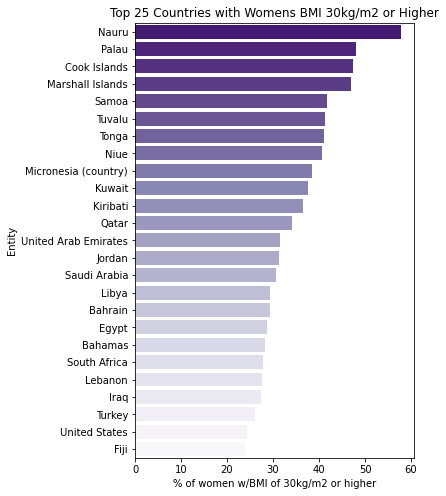

In [50]:
figure(num=None, figsize=(5,8), facecolor='w', edgecolor='r')
plt.title("Top 25 Countries with Womens BMI 30kg/m2 or Higher")
sns.barplot(data=top_25_women_by_country,x='% of women w/BMI of 30kg/m2 or higher', y='Entity', palette='Purples_r')
plt.savefig('top_25_women.jpg', bbox_inches='tight',pad_inches=0.3)
plt.show()

In [51]:
bottom_women=avg_women_by_country.sort_values('% of women w/BMI of 30kg/m2 or higher',ascending=True)

In [52]:
bottom_25_women_by_country=bottom_women.head(25)
bottom_25_women_by_country

Entity  % of women w/BMI of 30kg/m2 or higher
281          Vietnam                               0.904762
253            Timor                               1.871429
44          Cambodia                               1.871429
23        Bangladesh                               1.916667
175            Nepal                               2.083333
119            India                               2.152381
128            Japan                               2.247619
137             Laos                               2.445238
240  South-east Asia                               2.569048
53             China                               2.778571
237      South Korea                               2.809524
83          Ethiopia                               2.916667
171          Myanmar                               2.961905
284  Western Pacific                               3.095238
242        Sri Lanka                               3.111905
42      Burkina Faso                               3.114286
149       Madagascar                               3.190476
1        Afghanistan                               3.190476
79           Eritrea                               3.269048
31            Bhutan                               3.357143
120        Indonesia                               3.507143
43           Burundi                               3.600000
209           Rwanda                               3.654762
199      Philippines                               3.669048
267           Uganda                               3.709524

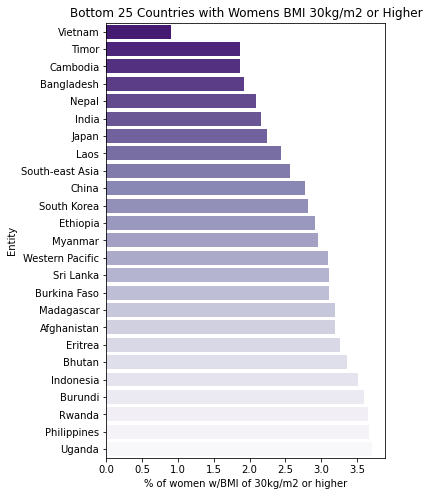

In [53]:
figure(num=None, figsize=(5,8), facecolor='w', edgecolor='r')
plt.title("Bottom 25 Countries with Womens BMI 30kg/m2 or Higher")
sns.barplot(data=bottom_25_women_by_country,x='% of women w/BMI of 30kg/m2 or higher', y='Entity', palette='Purples_r')
plt.savefig('bottom_25_women.jpg', bbox_inches='tight',pad_inches=0.3)
plt.show()

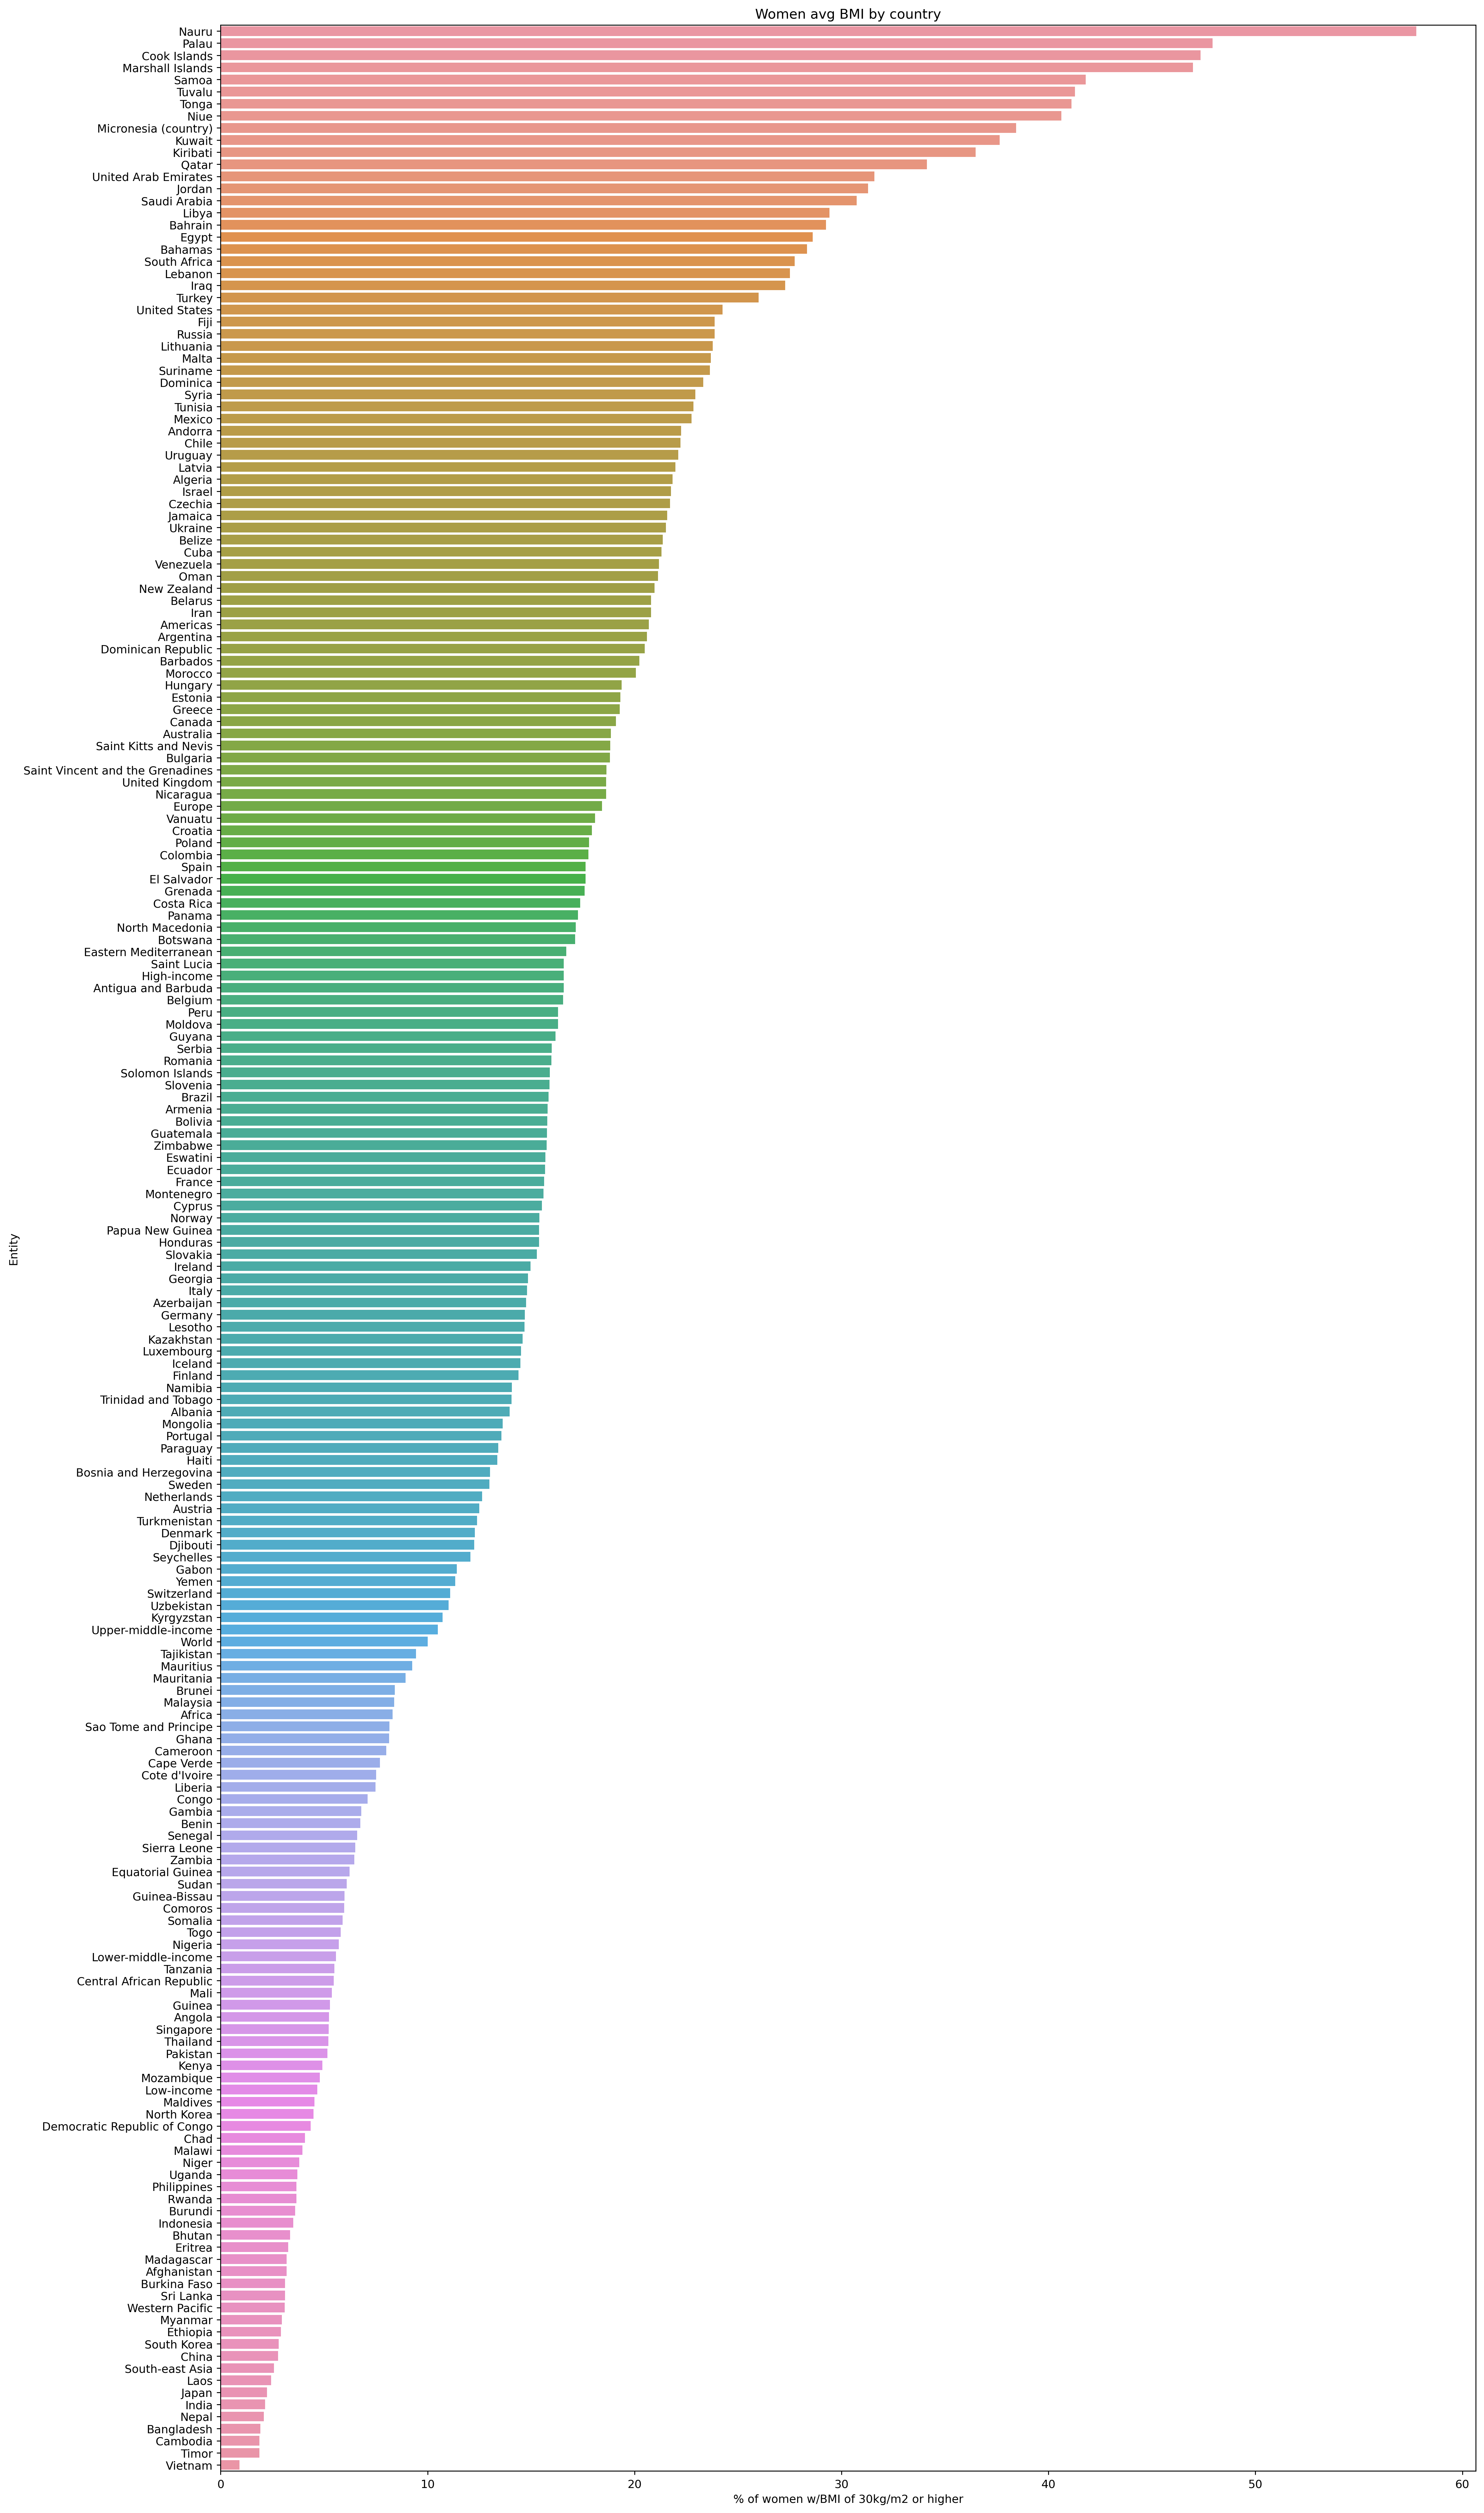

In [13]:
df=avg_women_by_country.sort_values('% of women w/BMI of 30kg/m2 or higher', ascending=False)
figure(num=None, figsize=(20,40),dpi=256, facecolor='w', edgecolor='r')
plt.title("Women avg BMI by country")
sns.barplot(data=df,x='% of women w/BMI of 30kg/m2 or higher', y='Entity')
plt.show()

### Average men BMI by Entity (Descending)

In [14]:
avg_men_by_country=men_vs_women.groupby('Entity')['% of men w/BMI of 30kg/m2 or higher'].mean().reset_index()
#avg_men_by_country.sort_values(ascending=False)
avg_men_by_country=pd.DataFrame(avg_men_by_country)
avg_men_by_country.columns=['Entity', '% of men w/BMI of 30kg/m2 or higher']
avg_men_by_country

Entity  \
0                                        Abkhazia   
1                                     Afghanistan   
2                                          Africa   
3                           Akrotiri and Dhekelia   
4                                         Albania   
5                                         Algeria   
6                                  American Samoa   
7                                        Americas   
8                                         Andorra   
9                                          Angola   
10                                       Anguilla   
11                                     Antarctica   
12                            Antigua and Barbuda   
13                                      Argentina   
14                                        Armenia   
15                                          Aruba   
16                                      Australia   
17                                        Austria   
18                                Austria-Hungary   
19                                     Azerbaijan   
20                                          Baden   
21                                        Bahamas   
22                                        Bahrain   
23                                     Bangladesh   
24                                       Barbados   
25                                        Bavaria   
26                                        Belarus   
27                                        Belgium   
28                                         Belize   
29                                          Benin   
30                                        Bermuda   
31                                         Bhutan   
32                                        Bolivia   
33                Bonaire Sint Eustatius and Saba   
34                         Bosnia and Herzegovina   
35                                       Botswana   
36                                  Bouvet Island   
37                                         Brazil   
38                 British Indian Ocean Territory   
39                         British Virgin Islands   
40                                         Brunei   
41                                       Bulgaria   
42                                   Burkina Faso   
43                                        Burundi   
44                                       Cambodia   
45                                       Cameroon   
46                                         Canada   
47                                     Cape Verde   
48                                 Cayman Islands   
49                       Central African Republic   
50                                           Chad   
51                                Channel Islands   
52                                          Chile   
53                                          China   
54                               Christmas Island   
55                                  Cocos Islands   
56                                       Colombia   
57                                        Comoros   
58                                          Congo   
59                                   Cook Islands   
60                                     Costa Rica   
61                                  Cote d'Ivoire   
62                                        Croatia   
63                                           Cuba   
64                                        Curacao   
65                                         Cyprus   
66                                        Czechia   
67                                 Czechoslovakia   
68                   Democratic Republic of Congo   
69                                        Denmark   
70                                       Djibouti   
71                                       Dominica   
72                             Dominican Republic   
73                                   East Germany   
74                          Eastern Mediterranean   
75             

In [15]:
avg_men_by_country=avg_men_by_country.dropna()
avg_men_by_country

Entity  % of men w/BMI of 30kg/m2 or higher
1                         Afghanistan                             1.145238
2                              Africa                             2.345238
4                             Albania                            10.959524
5                             Algeria                             9.388095
7                            Americas                            15.652381
8                             Andorra                            18.552381
9                              Angola                             1.402381
12                Antigua and Barbuda                             6.135714
13                          Argentina                            17.380952
14                            Armenia                            10.011905
16                          Australia                            18.257143
17                            Austria                            13.021429
19                         Azerbaijan                             8.452381
21                            Bahamas                            14.145238
22                            Bahrain                            16.128571
23                         Bangladesh                             0.730952
24                           Barbados                             7.545238
26                            Belarus                            12.719048
27                            Belgium                            14.997619
28                             Belize                             8.914286
29                              Benin                             1.890476
31                             Bhutan                             1.547619
32                            Bolivia                             7.223810
34             Bosnia and Herzegovina                             9.723810
35                           Botswana                             3.264286
37                             Brazil                             9.671429
40                             Brunei                             5.069048
41                           Bulgaria                            15.630952
42                       Burkina Faso                             0.866667
43                            Burundi                             0.811905
44                           Cambodia                             0.883333
45                           Cameroon                             2.428571
46                             Canada                            17.940476
47                         Cape Verde                             2.573810
49           Central African Republic                             1.554762
50                               Chad                             1.259524
52                              Chile                            15.628571
53                              China                             1.850000
56                           Colombia                             9.483333
57                            Comoros                             1.466667
58                              Congo                             2.230952
59                       Cook Islands                            36.395238
60                         Costa Rica                             9.683333
61                      Cote d'Ivoire                             2.290476
62                            Croatia                            14.269048
63                               Cuba                            10.095238
65                             Cyprus                            12.980952
66                            Czechia                            18.019048
68       Democratic Republic of Congo                             1.338095
69                            Denmark                            13.435714
70                           Djibouti                             4.642857
71                           Dominica                            10.061905
72                 Dominican Republic                   

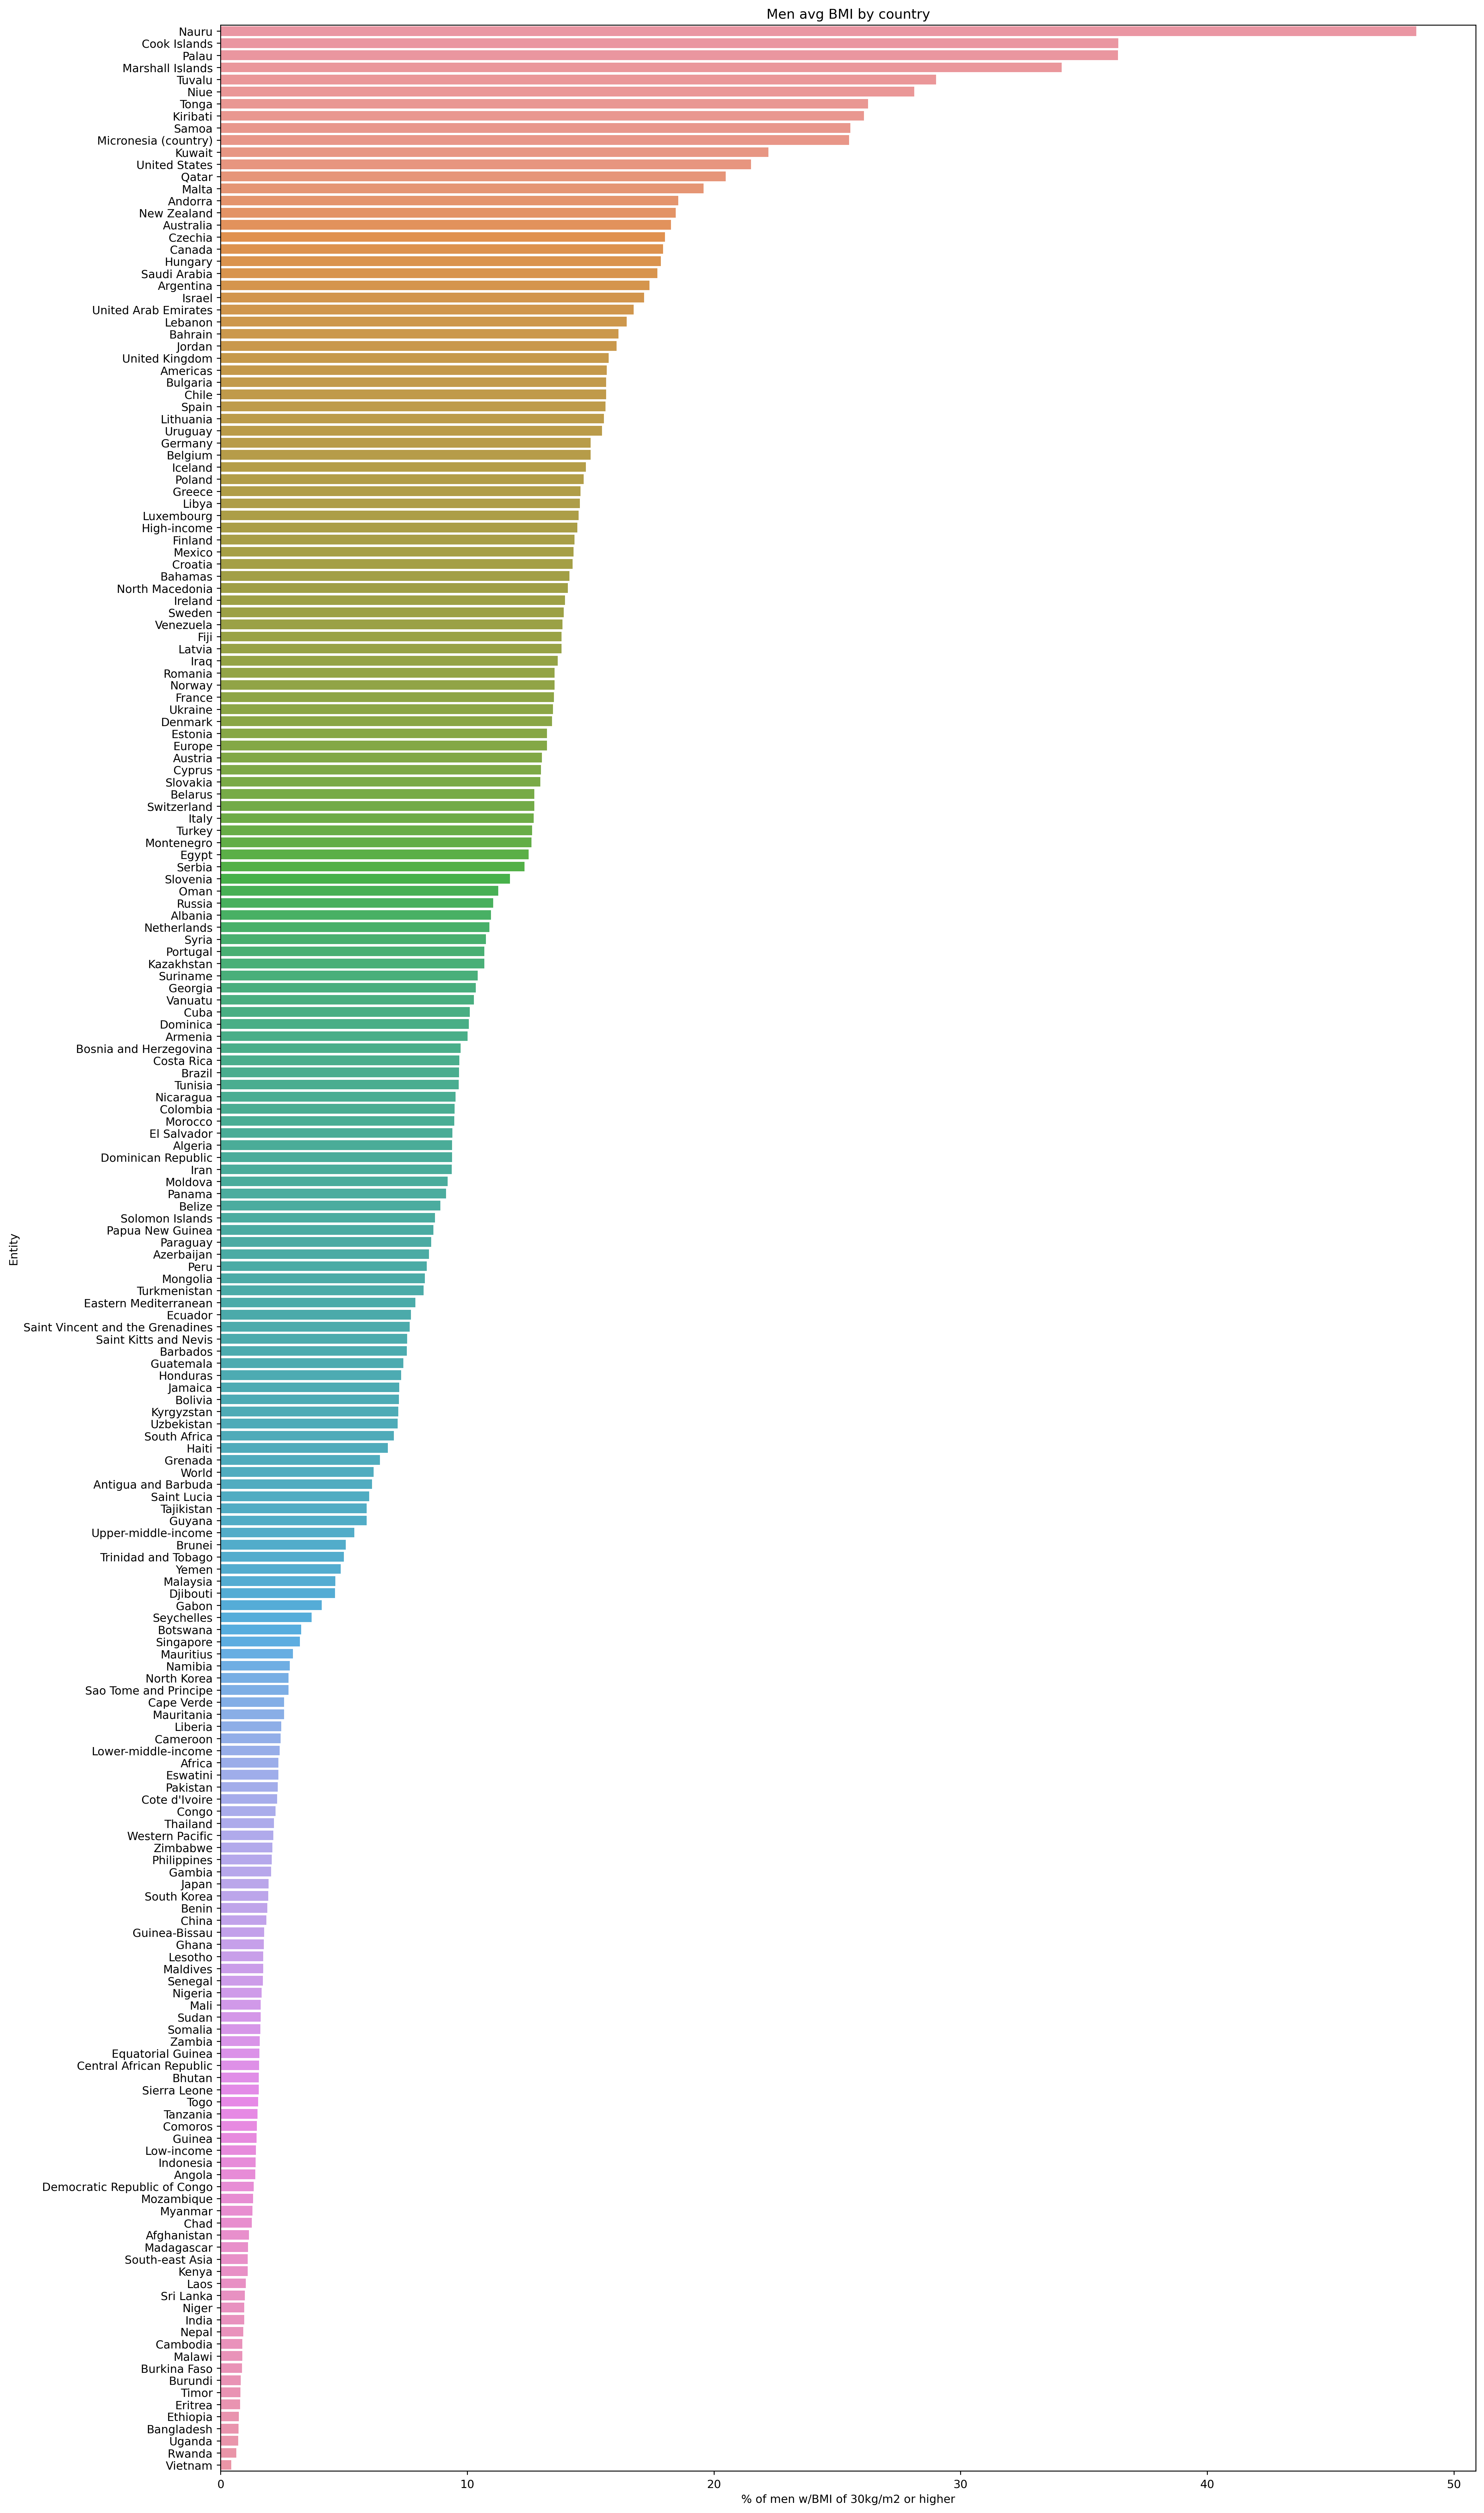

In [16]:
df=avg_men_by_country.sort_values('% of men w/BMI of 30kg/m2 or higher', ascending=False)
figure(num=None, figsize=(20,40),dpi=256, facecolor='w', edgecolor='r')
plt.title("Men avg BMI by country")
sns.barplot(data=df,x='% of men w/BMI of 30kg/m2 or higher', y='Entity')
plt.show()

In [17]:
m_vs_w_25.describe()

Year  % of men w/BMI of 30kg/m2 or higher  \
count  6356.000000                          6262.000000   
mean   2001.207048                            10.683999   
std       9.038005                             9.366403   
min    1986.000000                             0.100000   
25%    1993.000000                             2.600000   
50%    2001.000000                             9.100000   
75%    2009.000000                            16.000000   
max    2016.000000                            58.700000   

       % of women w/BMI of 30kg/m2 or higher  
count                            6262.000000  
mean                               17.106068  
std                                11.444239  
min                                 0.400000  
25%                                 7.900000  
50%                                16.100000  
75%                                23.000000  
max                                63.300000

In [44]:
top_men=avg_men_by_country.sort_values('% of men w/BMI of 30kg/m2 or higher',ascending=False)

In [45]:
top_25_men_by_country=top_men.head(25)
top_25_men_by_country

Entity  % of men w/BMI of 30kg/m2 or higher
174                 Nauru                            48.471429
59           Cook Islands                            36.395238
192                 Palau                            36.383333
155      Marshall Islands                            34.095238
264                Tuvalu                            29.007143
183                  Niue                            28.121429
256                 Tonga                            26.254762
133              Kiribati                            26.083333
217                 Samoa                            25.533333
162  Micronesia (country)                            25.473810
135                Kuwait                            22.211905
272         United States                            21.502381
204                 Qatar                            20.476190
154                 Malta                            19.585714
8                 Andorra                            18.552381
179           New Zealand                            18.450000
16              Australia                            18.257143
66                Czechia                            18.019048
46                 Canada                            17.940476
117               Hungary                            17.854762
220          Saudi Arabia                            17.709524
13              Argentina                            17.380952
125                Israel                            17.171429
269  United Arab Emirates                            16.742857
139               Lebanon                            16.457143

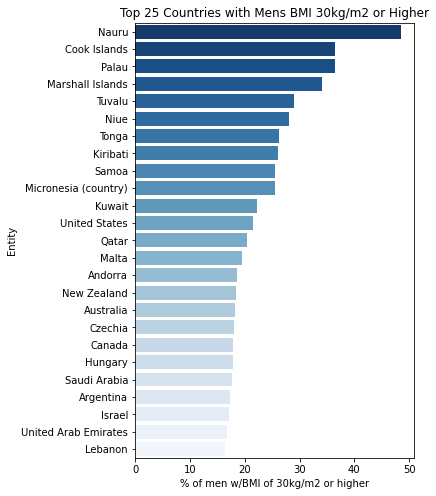

In [54]:
figure(num=None, figsize=(5,8), facecolor='w', edgecolor='r')
plt.title("Top 25 Countries with Mens BMI 30kg/m2 or Higher")
sns.barplot(data=top_25_men_by_country,x='% of men w/BMI of 30kg/m2 or higher', y='Entity', palette='Blues_r')
plt.savefig('top_25_men.jpg', bbox_inches='tight',pad_inches=0.3)
plt.show()

In [55]:
bottom_men=avg_men_by_country.sort_values('% of men w/BMI of 30kg/m2 or higher',ascending=True)

In [56]:
bottom_25_men_by_country=bottom_men.head(25)
bottom_25_men_by_country

Entity  % of men w/BMI of 30kg/m2 or higher
281                       Vietnam                             0.433333
209                        Rwanda                             0.638095
267                        Uganda                             0.711905
23                     Bangladesh                             0.730952
83                       Ethiopia                             0.733333
79                        Eritrea                             0.795238
253                         Timor                             0.802381
43                        Burundi                             0.811905
42                   Burkina Faso                             0.866667
150                        Malawi                             0.880952
44                       Cambodia                             0.883333
175                         Nepal                             0.919048
119                         India                             0.957143
181                         Niger                             0.961905
242                     Sri Lanka                             0.976190
137                          Laos                             1.021429
132                         Kenya                             1.100000
240               South-east Asia                             1.102381
149                    Madagascar                             1.109524
1                     Afghanistan                             1.145238
50                           Chad                             1.259524
171                       Myanmar                             1.295238
170                    Mozambique                             1.319048
68   Democratic Republic of Congo                             1.338095
9                          Angola                             1.402381

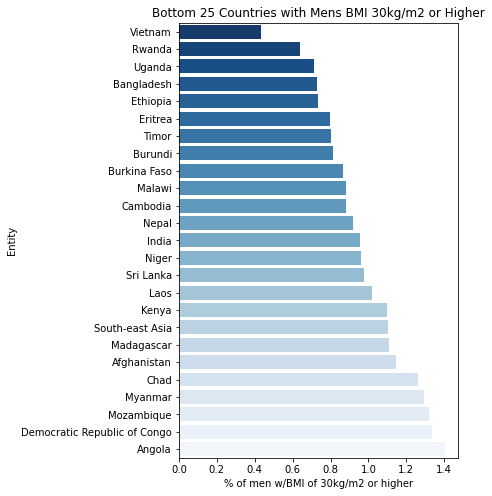

In [57]:
figure(num=None, figsize=(5,8), facecolor='w', edgecolor='r')
plt.title("Bottom 25 Countries with Mens BMI 30kg/m2 or Higher")
sns.barplot(data=bottom_25_men_by_country,x='% of men w/BMI of 30kg/m2 or higher', y='Entity', palette='Blues_r')
plt.savefig('bottom_25_men.jpg', bbox_inches='tight',pad_inches=0.3)
plt.show()

In [20]:
men_vs_women['Year'].unique()

array([2015, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984,
       1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995,
       1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006,
       2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2016], dtype=int64)

In [21]:
us_bmi = pd.read_csv('../data/NCD_RisC_Lancet_2017_BMI_age_standardised_United States of America2.csv')

In [22]:
us_bmi

Country/Region/World  ISO    Sex  Year   Mean BMI  \
0   United States of America  USA    Men  1975  25.289004   
1   United States of America  USA    Men  1976  25.347719   
2   United States of America  USA    Men  1977  25.405960   
3   United States of America  USA    Men  1978  25.465292   
4   United States of America  USA    Men  1979  25.527234   
5   United States of America  USA    Men  1980  25.592312   
6   United States of America  USA    Men  1981  25.662449   
7   United States of America  USA    Men  1982  25.737904   
8   United States of America  USA    Men  1983  25.818297   
9   United States of America  USA    Men  1984  25.903410   
10  United States of America  USA    Men  1985  25.993417   
11  United States of America  USA    Men  1986  26.087701   
12  United States of America  USA    Men  1987  26.185576   
13  United States of America  USA    Men  1988  26.287496   
14  United States of America  USA    Men  1989  26.393803   
15  United States of America  USA    Men  1990  26.504589   
16  United States of America  USA    Men  1991  26.620734   
17  United States of America  USA    Men  1992  26.741411   
18  United States of America  USA    Men  1993  26.865551   
19  United States of America  USA    Men  1994  26.992722   
20  United States of America  USA    Men  1995  27.121533   
21  United States of America  USA    Men  1996  27.250687   
22  United States of America  USA    Men  1997  27.379647   
23  United States of America  USA    Men  1998  27.507873   
24  United States of America  USA    Men  1999  27.635375   
25  United States of America  USA    Men  2000  27.761707   
26  United States of America  USA    Men  2001  27.885244   
27  United States of America  USA    Men  2002  28.004864   
28  United States of America  USA    Men  2003  28.120228   
29  United States of America  USA    Men  2004  28.230635   
30  United States of America  USA    Men  2005  28.334788   
31  United States of America  USA    Men  2006  28.433046   
32  United States of America  USA    Men  2007  28.524040   
33  United States of America  USA    Men  2008  28.607092   
34  United States of America  USA    Men  2009  28.680926   
35  United States of America  USA    Men  2010  28.744276   
36  United States of America  USA    Men  2011  28.798413   
37  United States of America  USA    Men  2012  28.845012   
38  United States of America  USA    Men  2013  28.887995   
39  United States of America  USA    Men  2014  28.929397   
40  United States of America  USA    Men  2015  28.971172   
41  United States of America  USA    Men  2016  29.013220   
42  United States of America  USA  Women  1975  24.719590   
43  United States of America  USA  Women  1976  24.793990   
44  United States of America  USA  Women  1977  24.867150   
45  United States of America  USA  Women  1978  24.940149   
46  United States of America  USA  Women  1979  25.014333   
47  United States of America  USA  Women  1980  25.091710   
48  United States of America  USA  Women  1981  25.175194   
49  United States of America  USA  Women  1982  25.265105   
50  United States of America  USA  Women  1983  25.361073   
51  United States of America  USA  Women  1984  25.462928   
52  United States of America  USA  Women  1985  25.569691   
53  United States of America  USA  Women  1986  25.680783   
54  United States of America  USA  Women  1987  25.796414   
55  United States of America  USA  Women  1988  25.916183   
56  United States of America  USA  Women  1989  26.039726   
57  United States of America  USA  Women  1990  26.167177   
58  United States of America  USA  Women  1991  26.300210   
59  United States of America  USA  Women  1992  26.437822   
60  United States of America  USA  Women  1993  26.579174   
61  United States of America  USA  Women  1994  26.723087   
62  United States of America  USA  Women  1995  26.868630   
63  United States of America  USA  Women  1996  27.014780   
64  United States of America  USA  Women  1

In [23]:
us_bmi_clean=us_bmi.drop(us_bmi.columns[[5,6,8,9,11,12,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,32,33]],axis=1, inplace=True)
us_bmi_clean

In [24]:
us_bmi

Country/Region/World  ISO    Sex  Year   Mean BMI  \
0   United States of America  USA    Men  1975  25.289004   
1   United States of America  USA    Men  1976  25.347719   
2   United States of America  USA    Men  1977  25.405960   
3   United States of America  USA    Men  1978  25.465292   
4   United States of America  USA    Men  1979  25.527234   
5   United States of America  USA    Men  1980  25.592312   
6   United States of America  USA    Men  1981  25.662449   
7   United States of America  USA    Men  1982  25.737904   
8   United States of America  USA    Men  1983  25.818297   
9   United States of America  USA    Men  1984  25.903410   
10  United States of America  USA    Men  1985  25.993417   
11  United States of America  USA    Men  1986  26.087701   
12  United States of America  USA    Men  1987  26.185576   
13  United States of America  USA    Men  1988  26.287496   
14  United States of America  USA    Men  1989  26.393803   
15  United States of America  USA    Men  1990  26.504589   
16  United States of America  USA    Men  1991  26.620734   
17  United States of America  USA    Men  1992  26.741411   
18  United States of America  USA    Men  1993  26.865551   
19  United States of America  USA    Men  1994  26.992722   
20  United States of America  USA    Men  1995  27.121533   
21  United States of America  USA    Men  1996  27.250687   
22  United States of America  USA    Men  1997  27.379647   
23  United States of America  USA    Men  1998  27.507873   
24  United States of America  USA    Men  1999  27.635375   
25  United States of America  USA    Men  2000  27.761707   
26  United States of America  USA    Men  2001  27.885244   
27  United States of America  USA    Men  2002  28.004864   
28  United States of America  USA    Men  2003  28.120228   
29  United States of America  USA    Men  2004  28.230635   
30  United States of America  USA    Men  2005  28.334788   
31  United States of America  USA    Men  2006  28.433046   
32  United States of America  USA    Men  2007  28.524040   
33  United States of America  USA    Men  2008  28.607092   
34  United States of America  USA    Men  2009  28.680926   
35  United States of America  USA    Men  2010  28.744276   
36  United States of America  USA    Men  2011  28.798413   
37  United States of America  USA    Men  2012  28.845012   
38  United States of America  USA    Men  2013  28.887995   
39  United States of America  USA    Men  2014  28.929397   
40  United States of America  USA    Men  2015  28.971172   
41  United States of America  USA    Men  2016  29.013220   
42  United States of America  USA  Women  1975  24.719590   
43  United States of America  USA  Women  1976  24.793990   
44  United States of America  USA  Women  1977  24.867150   
45  United States of America  USA  Women  1978  24.940149   
46  United States of America  USA  Women  1979  25.014333   
47  United States of America  USA  Women  1980  25.091710   
48  United States of America  USA  Women  1981  25.175194   
49  United States of America  USA  Women  1982  25.265105   
50  United States of America  USA  Women  1983  25.361073   
51  United States of America  USA  Women  1984  25.462928   
52  United States of America  USA  Women  1985  25.569691   
53  United States of America  USA  Women  1986  25.680783   
54  United States of America  USA  Women  1987  25.796414   
55  United States of America  USA  Women  1988  25.916183   
56  United States of America  USA  Women  1989  26.039726   
57  United States of America  USA  Women  1990  26.167177   
58  United States of America  USA  Women  1991  26.300210   
59  United States of America  USA  Women  1992  26.437822   
60  United States of America  USA  Women  1993  26.579174   
61  United States of America  USA  Women  1994  26.723087   
62  United States of America  USA  Women  1995  26.868630   
63  United States of America  USA  Women  1996  27.014780   
64  United States of America  USA  Women  1

In [25]:
us_bmi['% of pop.-obesity']=round(us_bmi['Prevalence of BMI>=30 kg/m² (obesity)']*100,2)

In [26]:
us_bmi['% of pop.-severe obesity']=round(us_bmi['Prevalence of BMI>=35 kg/m² (severe obesity)']*100,2)

In [27]:
us_bmi['% of pop.-underweight']=round(us_bmi['Prevalence of BMI<18.5 kg/m² (underweight)']*100,2)

In [28]:
us_bmi['% of pop.-morbid obesity']=round(us_bmi['Prevalence of BMI >=40 kg/m²(morbid obesity)']*100,2)

### U.S. BMI cleaned and ready

In [29]:
us_bmi

Country/Region/World  ISO    Sex  Year   Mean BMI  \
0   United States of America  USA    Men  1975  25.289004   
1   United States of America  USA    Men  1976  25.347719   
2   United States of America  USA    Men  1977  25.405960   
3   United States of America  USA    Men  1978  25.465292   
4   United States of America  USA    Men  1979  25.527234   
5   United States of America  USA    Men  1980  25.592312   
6   United States of America  USA    Men  1981  25.662449   
7   United States of America  USA    Men  1982  25.737904   
8   United States of America  USA    Men  1983  25.818297   
9   United States of America  USA    Men  1984  25.903410   
10  United States of America  USA    Men  1985  25.993417   
11  United States of America  USA    Men  1986  26.087701   
12  United States of America  USA    Men  1987  26.185576   
13  United States of America  USA    Men  1988  26.287496   
14  United States of America  USA    Men  1989  26.393803   
15  United States of America  USA    Men  1990  26.504589   
16  United States of America  USA    Men  1991  26.620734   
17  United States of America  USA    Men  1992  26.741411   
18  United States of America  USA    Men  1993  26.865551   
19  United States of America  USA    Men  1994  26.992722   
20  United States of America  USA    Men  1995  27.121533   
21  United States of America  USA    Men  1996  27.250687   
22  United States of America  USA    Men  1997  27.379647   
23  United States of America  USA    Men  1998  27.507873   
24  United States of America  USA    Men  1999  27.635375   
25  United States of America  USA    Men  2000  27.761707   
26  United States of America  USA    Men  2001  27.885244   
27  United States of America  USA    Men  2002  28.004864   
28  United States of America  USA    Men  2003  28.120228   
29  United States of America  USA    Men  2004  28.230635   
30  United States of America  USA    Men  2005  28.334788   
31  United States of America  USA    Men  2006  28.433046   
32  United States of America  USA    Men  2007  28.524040   
33  United States of America  USA    Men  2008  28.607092   
34  United States of America  USA    Men  2009  28.680926   
35  United States of America  USA    Men  2010  28.744276   
36  United States of America  USA    Men  2011  28.798413   
37  United States of America  USA    Men  2012  28.845012   
38  United States of America  USA    Men  2013  28.887995   
39  United States of America  USA    Men  2014  28.929397   
40  United States of America  USA    Men  2015  28.971172   
41  United States of America  USA    Men  2016  29.013220   
42  United States of America  USA  Women  1975  24.719590   
43  United States of America  USA  Women  1976  24.793990   
44  United States of America  USA  Women  1977  24.867150   
45  United States of America  USA  Women  1978  24.940149   
46  United States of America  USA  Women  1979  25.014333   
47  United States of America  USA  Women  1980  25.091710   
48  United States of America  USA  Women  1981  25.175194   
49  United States of America  USA  Women  1982  25.265105   
50  United States of America  USA  Women  1983  25.361073   
51  United States of America  USA  Women  1984  25.462928   
52  United States of America  USA  Women  1985  25.569691   
53  United States of America  USA  Women  1986  25.680783   
54  United States of America  USA  Women  1987  25.796414   
55  United States of America  USA  Women  1988  25.916183   
56  United States of America  USA  Women  1989  26.039726   
57  United States of America  USA  Women  1990  26.167177   
58  United States of America  USA  Women  1991  26.300210   
59  United States of America  USA  Women  1992  26.437822   
60  United States of America  USA  Women  1993  26.579174   
61  United States of America  USA  Women  1994  26.723087   
62  United States of America  USA  Women  1995  26.868630   
63  United States of America  USA  Women  1996  27.014780   
64  United States of America  USA  Women  1

### US Men BMI

In [30]:
us_men_bmi=us_bmi[us_bmi['Sex']=='Men']
us_men_bmi

Country/Region/World  ISO  Sex  Year   Mean BMI  \
0   United States of America  USA  Men  1975  25.289004   
1   United States of America  USA  Men  1976  25.347719   
2   United States of America  USA  Men  1977  25.405960   
3   United States of America  USA  Men  1978  25.465292   
4   United States of America  USA  Men  1979  25.527234   
5   United States of America  USA  Men  1980  25.592312   
6   United States of America  USA  Men  1981  25.662449   
7   United States of America  USA  Men  1982  25.737904   
8   United States of America  USA  Men  1983  25.818297   
9   United States of America  USA  Men  1984  25.903410   
10  United States of America  USA  Men  1985  25.993417   
11  United States of America  USA  Men  1986  26.087701   
12  United States of America  USA  Men  1987  26.185576   
13  United States of America  USA  Men  1988  26.287496   
14  United States of America  USA  Men  1989  26.393803   
15  United States of America  USA  Men  1990  26.504589   
16  United States of America  USA  Men  1991  26.620734   
17  United States of America  USA  Men  1992  26.741411   
18  United States of America  USA  Men  1993  26.865551   
19  United States of America  USA  Men  1994  26.992722   
20  United States of America  USA  Men  1995  27.121533   
21  United States of America  USA  Men  1996  27.250687   
22  United States of America  USA  Men  1997  27.379647   
23  United States of America  USA  Men  1998  27.507873   
24  United States of America  USA  Men  1999  27.635375   
25  United States of America  USA  Men  2000  27.761707   
26  United States of America  USA  Men  2001  27.885244   
27  United States of America  USA  Men  2002  28.004864   
28  United States of America  USA  Men  2003  28.120228   
29  United States of America  USA  Men  2004  28.230635   
30  United States of America  USA  Men  2005  28.334788   
31  United States of America  USA  Men  2006  28.433046   
32  United States of America  USA  Men  2007  28.524040   
33  United States of America  USA  Men  2008  28.607092   
34  United States of America  USA  Men  2009  28.680926   
35  United States of America  USA  Men  2010  28.744276   
36  United States of America  USA  Men  2011  28.798413   
37  United States of America  USA  Men  2012  28.845012   
38  United States of America  USA  Men  2013  28.887995   
39  United States of America  USA  Men  2014  28.929397   
40  United States of America  USA  Men  2015  28.971172   
41  United States of America  USA  Men  2016  29.013220   

    Prevalence of BMI>=30 kg/m² (obesity)  \
0                                0.107136   
1                                0.110666   
2                                0.114265   
3                                0.117944   
4                                0.121725   
5                                0.125626   
6                                0.129725   
7                                0.134047   
8                                0.138571   
9                                0.143301   
10                               0.148250   
11                               0.153409   
12                               0.158784   
13                               0.164362   
14                               0.170136   
15                               0.176103   
16                               0.182365   
17                               0.188896   
18                               0.195691   
19                               0.202720   
20                               0.209947   
21                               0.217327   
22                               0.224868   
23                               0.232511   
24                               0.240245   
25                               0.248030   
26                               0.255743   
27                               0.263361   
28                               0.270888   
29                               0.278323   
30                               0.285671   
31                            

In [63]:
us_men_mean_bmi=us_men_bmi[['Year','Mean BMI']].copy()
us_men_mean_bmi

Year   Mean BMI
0   1975  25.289004
1   1976  25.347719
2   1977  25.405960
3   1978  25.465292
4   1979  25.527234
5   1980  25.592312
6   1981  25.662449
7   1982  25.737904
8   1983  25.818297
9   1984  25.903410
10  1985  25.993417
11  1986  26.087701
12  1987  26.185576
13  1988  26.287496
14  1989  26.393803
15  1990  26.504589
16  1991  26.620734
17  1992  26.741411
18  1993  26.865551
19  1994  26.992722
20  1995  27.121533
21  1996  27.250687
22  1997  27.379647
23  1998  27.507873
24  1999  27.635375
25  2000  27.761707
26  2001  27.885244
27  2002  28.004864
28  2003  28.120228
29  2004  28.230635
30  2005  28.334788
31  2006  28.433046
32  2007  28.524040
33  2008  28.607092
34  2009  28.680926
35  2010  28.744276
36  2011  28.798413
37  2012  28.845012
38  2013  28.887995
39  2014  28.929397
40  2015  28.971172
41  2016  29.013220

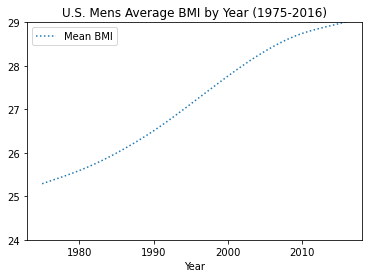

In [137]:
us_men_mean_bmi.plot(x='Year',
                    kind='line',
                     linestyle='dotted',
                    title='U.S. Mens Average BMI by Year (1975-2016)')
plt.legend(loc='upper left')
plt.ylim(24,29)
plt.savefig('us_men_mean_bmi.jpg', bbox_inches='tight',pad_inches=0.3)
plt.show()

In [104]:
us_men_bmi_by_type=us_men_bmi[['Year','% of pop.-obesity','% of pop.-severe obesity','% of pop.-morbid obesity']].copy()
us_men_bmi_by_type

Year  % of pop.-obesity  % of pop.-severe obesity  \
0   1975              10.71                      1.36   
1   1976              11.07                      1.45   
2   1977              11.43                      1.55   
3   1978              11.79                      1.65   
4   1979              12.17                      1.76   
5   1980              12.56                      1.88   
6   1981              12.97                      2.01   
7   1982              13.40                      2.14   
8   1983              13.86                      2.29   
9   1984              14.33                      2.46   
10  1985              14.83                      2.63   
11  1986              15.34                      2.82   
12  1987              15.88                      3.02   
13  1988              16.44                      3.24   
14  1989              17.01                      3.47   
15  1990              17.61                      3.72   
16  1991              18.24                      3.98   
17  1992              18.89                      4.27   
18  1993              19.57                      4.58   
19  1994              20.27                      4.91   
20  1995              20.99                      5.26   
21  1996              21.73                      5.63   
22  1997              22.49                      6.02   
23  1998              23.25                      6.42   
24  1999              24.02                      6.84   
25  2000              24.80                      7.28   
26  2001              25.57                      7.72   
27  2002              26.34                      8.17   
28  2003              27.09                      8.63   
29  2004              27.83                      9.09   
30  2005              28.57                      9.55   
31  2006              29.29                     10.02   
32  2007              30.02                     10.50   
33  2008              30.73                     10.98   
34  2009              31.45                     11.47   
35  2010              32.16                     11.97   
36  2011              32.87                     12.47   
37  2012              33.59                     12.98   
38  2013              34.30                     13.51   
39  2014              35.02                     14.04   
40  2015              35.74                     14.59   
41  2016              36.47                     15.15   

    % of pop.-morbid obesity  
0                       0.24  
1                       0.26  
2                       0.28  
3                       0.31  
4                       0.34  
5                       0.37  
6                       0.40  
7                       0.44  
8                       0.48  
9                       0.53  
10                      0.58  
11                      0.63  
12                      0.69  
13                      0.76  
14                      0.84  
15                      0.92  
16                      1.01  
17                      1.11  
18                      1.22  
19                      1.34  
20                      1.47  
21                      1.61  
22                      1.76  
23                      1.92  
24                      2.09  
25                      2.26  
26                      2.45  
27                      2.64  
28                      2.83  
29                      3.04  
30                      3.24  
31                      3.46  
32                      3.67  
33                      3.90  
34                      4.13  
35                      4.36  
36                      4.61  
37                      4.86  
38                      5.12  
39                      5.39  
40                      5.67  
41                      5.96

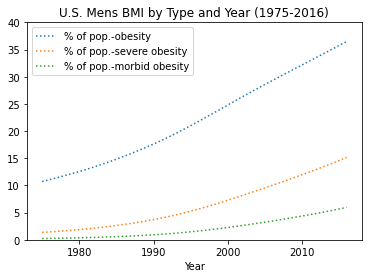

In [131]:
us_men_bmi_by_type.plot(x='Year',
                    kind='line',
                     linestyle='dotted',
                    title='U.S. Mens BMI by Type and Year (1975-2016)')
plt.legend(loc='upper left')
plt.ylim(0,40)
plt.savefig('us_men_bmi_type.jpg', bbox_inches='tight',pad_inches=0.3)
plt.show()

In [108]:
us_men_underweight=us_men_bmi[['Year','% of pop.-underweight']].copy()
us_men_underweight

Year  % of pop.-underweight
0   1975                   1.88
1   1976                   1.80
2   1977                   1.73
3   1978                   1.65
4   1979                   1.59
5   1980                   1.52
6   1981                   1.46
7   1982                   1.40
8   1983                   1.35
9   1984                   1.29
10  1985                   1.25
11  1986                   1.20
12  1987                   1.16
13  1988                   1.12
14  1989                   1.08
15  1990                   1.04
16  1991                   1.01
17  1992                   0.97
18  1993                   0.94
19  1994                   0.91
20  1995                   0.88
21  1996                   0.85
22  1997                   0.82
23  1998                   0.80
24  1999                   0.77
25  2000                   0.74
26  2001                   0.72
27  2002                   0.70
28  2003                   0.68
29  2004                   0.66
30  2005                   0.64
31  2006                   0.63
32  2007                   0.61
33  2008                   0.59
34  2009                   0.58
35  2010                   0.56
36  2011                   0.55
37  2012                   0.54
38  2013                   0.53
39  2014                   0.51
40  2015                   0.50
41  2016                   0.49

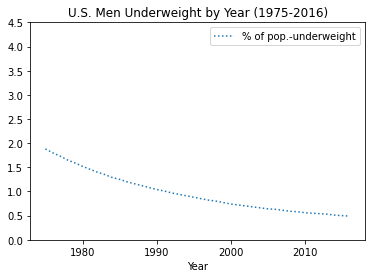

In [127]:
us_men_underweight.plot(x='Year',
                    kind='line',
                     linestyle='dotted',
                    title='U.S. Men Underweight by Year (1975-2016)')
plt.legend(loc='upper right')
plt.ylim(0,4.5)
plt.savefig('us_men_underweight.jpg', bbox_inches='tight',pad_inches=0.3)
plt.show()

### US Women BMI

In [31]:
us_women_bmi=us_bmi[us_bmi['Sex']=='Women']
us_women_bmi

Country/Region/World  ISO    Sex  Year   Mean BMI  \
42  United States of America  USA  Women  1975  24.719590   
43  United States of America  USA  Women  1976  24.793990   
44  United States of America  USA  Women  1977  24.867150   
45  United States of America  USA  Women  1978  24.940149   
46  United States of America  USA  Women  1979  25.014333   
47  United States of America  USA  Women  1980  25.091710   
48  United States of America  USA  Women  1981  25.175194   
49  United States of America  USA  Women  1982  25.265105   
50  United States of America  USA  Women  1983  25.361073   
51  United States of America  USA  Women  1984  25.462928   
52  United States of America  USA  Women  1985  25.569691   
53  United States of America  USA  Women  1986  25.680783   
54  United States of America  USA  Women  1987  25.796414   
55  United States of America  USA  Women  1988  25.916183   
56  United States of America  USA  Women  1989  26.039726   
57  United States of America  USA  Women  1990  26.167177   
58  United States of America  USA  Women  1991  26.300210   
59  United States of America  USA  Women  1992  26.437822   
60  United States of America  USA  Women  1993  26.579174   
61  United States of America  USA  Women  1994  26.723087   
62  United States of America  USA  Women  1995  26.868630   
63  United States of America  USA  Women  1996  27.014780   
64  United States of America  USA  Women  1997  27.160382   
65  United States of America  USA  Women  1998  27.303902   
66  United States of America  USA  Women  1999  27.444786   
67  United States of America  USA  Women  2000  27.581705   
68  United States of America  USA  Women  2001  27.711948   
69  United States of America  USA  Women  2002  27.835578   
70  United States of America  USA  Women  2003  27.951670   
71  United States of America  USA  Women  2004  28.061047   
72  United States of America  USA  Women  2005  28.164834   
73  United States of America  USA  Women  2006  28.263642   
74  United States of America  USA  Women  2007  28.358604   
75  United States of America  USA  Women  2008  28.449608   
76  United States of America  USA  Women  2009  28.537116   
77  United States of America  USA  Women  2010  28.620121   
78  United States of America  USA  Women  2011  28.698262   
79  United States of America  USA  Women  2012  28.773720   
80  United States of America  USA  Women  2013  28.848402   
81  United States of America  USA  Women  2014  28.922750   
82  United States of America  USA  Women  2015  28.996657   
83  United States of America  USA  Women  2016  29.070706   

    Prevalence of BMI>=30 kg/m² (obesity)  \
42                               0.138201   
43                               0.141961   
44                               0.145755   
45                               0.149608   
46                               0.153544   
47                               0.157591   
48                               0.161873   
49                               0.166380   
50                               0.171095   
51                               0.176018   
52                               0.181131   
53                               0.186446   
54                               0.191932   
55                               0.197590   
56                               0.203388   
57                               0.209333   
58                               0.215547   
59                               0.222004   
60                               0.228675   
61                               0.235549   
62                               0.242594   
63                               0.249734   
64                               0.256961   
65                               0.264217   
66                               0.271497   
67                               0.278757   
68                               0.285880   
69                               0.292858   
70                               0.299709   
71                               0

In [112]:
us_women_mean_bmi=us_women_bmi[['Year','Mean BMI']].copy()
us_women_mean_bmi

Year   Mean BMI
42  1975  24.719590
43  1976  24.793990
44  1977  24.867150
45  1978  24.940149
46  1979  25.014333
47  1980  25.091710
48  1981  25.175194
49  1982  25.265105
50  1983  25.361073
51  1984  25.462928
52  1985  25.569691
53  1986  25.680783
54  1987  25.796414
55  1988  25.916183
56  1989  26.039726
57  1990  26.167177
58  1991  26.300210
59  1992  26.437822
60  1993  26.579174
61  1994  26.723087
62  1995  26.868630
63  1996  27.014780
64  1997  27.160382
65  1998  27.303902
66  1999  27.444786
67  2000  27.581705
68  2001  27.711948
69  2002  27.835578
70  2003  27.951670
71  2004  28.061047
72  2005  28.164834
73  2006  28.263642
74  2007  28.358604
75  2008  28.449608
76  2009  28.537116
77  2010  28.620121
78  2011  28.698262
79  2012  28.773720
80  2013  28.848402
81  2014  28.922750
82  2015  28.996657
83  2016  29.070706

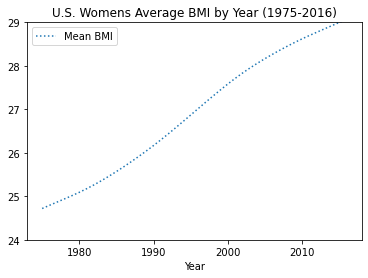

In [136]:
us_women_mean_bmi.plot(x='Year',
                    kind='line',
                     linestyle='dotted',
                    title='U.S. Womens Average BMI by Year (1975-2016)')
plt.legend(loc='upper left')
plt.ylim(24,29)
plt.savefig('us_women_mean_bmi.jpg', bbox_inches='tight',pad_inches=0.3)
plt.show()

In [118]:
us_women_bmi_by_type=us_women_bmi[['Year','% of pop.-obesity','% of pop.-severe obesity','% of pop.-morbid obesity']].copy()
us_women_bmi_by_type

Year  % of pop.-obesity  % of pop.-severe obesity  \
42  1975              13.82                      3.92   
43  1976              14.20                      4.12   
44  1977              14.58                      4.32   
45  1978              14.96                      4.52   
46  1979              15.35                      4.74   
47  1980              15.76                      4.96   
48  1981              16.19                      5.21   
49  1982              16.64                      5.47   
50  1983              17.11                      5.74   
51  1984              17.60                      6.04   
52  1985              18.11                      6.34   
53  1986              18.64                      6.67   
54  1987              19.19                      7.01   
55  1988              19.76                      7.37   
56  1989              20.34                      7.74   
57  1990              20.93                      8.12   
58  1991              21.55                      8.53   
59  1992              22.20                      8.95   
60  1993              22.87                      9.39   
61  1994              23.55                      9.85   
62  1995              24.26                     10.33   
63  1996              24.97                     10.81   
64  1997              25.70                     11.31   
65  1998              26.42                     11.82   
66  1999              27.15                     12.33   
67  2000              27.88                     12.84   
68  2001              28.59                     13.35   
69  2002              29.29                     13.86   
70  2003              29.97                     14.36   
71  2004              30.64                     14.86   
72  2005              31.30                     15.35   
73  2006              31.95                     15.84   
74  2007              32.59                     16.32   
75  2008              33.22                     16.81   
76  2009              33.84                     17.29   
77  2010              34.46                     17.78   
78  2011              35.08                     18.27   
79  2012              35.70                     18.76   
80  2013              36.32                     19.25   
81  2014              36.93                     19.75   
82  2015              37.55                     20.26   
83  2016              38.16                     20.76   

    % of pop.-morbid obesity  
42                      1.26  
43                      1.34  
44                      1.43  
45                      1.52  
46                      1.61  
47                      1.71  
48                      1.82  
49                      1.94  
50                      2.06  
51                      2.20  
52                      2.34  
53                      2.49  
54                      2.66  
55                      2.83  
56                      3.00  
57                      3.19  
58                      3.39  
59                      3.60  
60                      3.82  
61                      4.05  
62                      4.29  
63                      4.54  
64                      4.80  
65                      5.06  
66                      5.32  
67                      5.60  
68                      5.87  
69                      6.14  
70                      6.41  
71                      6.68  
72                      6.96  
73                      7.23  
74                      7.50  
75                      7.78  
76                      8.05  
77                      8.33  
78                      8.61  
79                      8.90  
80                      9.18  
81                      9.48  
82                      9.77  
83                     10.07

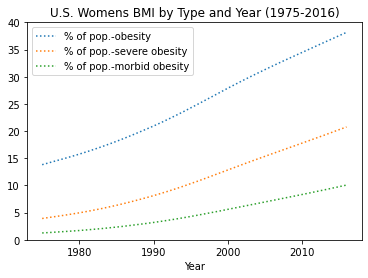

In [130]:
us_women_bmi_by_type.plot(x='Year',
                    kind='line',
                     linestyle='dotted',
                    title='U.S. Womens BMI by Type and Year (1975-2016)')
plt.legend(loc='upper left')
plt.ylim(0,40)
plt.savefig('us_women_bmi_type.jpg', bbox_inches='tight',pad_inches=0.3)
plt.show()

In [120]:
us_women_underweight=us_women_bmi[['Year','% of pop.-underweight']].copy()
us_women_underweight

Year  % of pop.-underweight
42  1975                   4.48
43  1976                   4.34
44  1977                   4.22
45  1978                   4.10
46  1979                   3.98
47  1980                   3.87
48  1981                   3.76
49  1982                   3.66
50  1983                   3.55
51  1984                   3.45
52  1985                   3.34
53  1986                   3.25
54  1987                   3.15
55  1988                   3.06
56  1989                   2.97
57  1990                   2.89
58  1991                   2.80
59  1992                   2.72
60  1993                   2.64
61  1994                   2.56
62  1995                   2.49
63  1996                   2.42
64  1997                   2.35
65  1998                   2.29
66  1999                   2.23
67  2000                   2.17
68  2001                   2.12
69  2002                   2.07
70  2003                   2.03
71  2004                   1.99
72  2005                   1.96
73  2006                   1.92
74  2007                   1.89
75  2008                   1.86
76  2009                   1.83
77  2010                   1.81
78  2011                   1.78
79  2012                   1.76
80  2013                   1.74
81  2014                   1.71
82  2015                   1.69
83  2016                   1.67

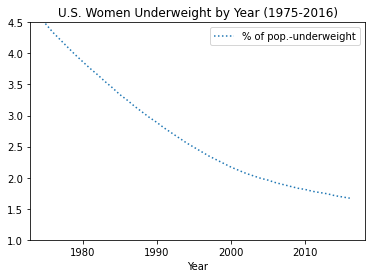

In [125]:
us_women_underweight.plot(x='Year',
                    kind='line',
                     linestyle='dotted',
                    title='U.S. Women Underweight by Year (1975-2016)')
plt.legend(loc='upper right')
plt.ylim([1,4.5])
plt.savefig('us_women_underweight.jpg', bbox_inches='tight',pad_inches=0.3)
plt.show()

In [32]:
us_bmi.describe()

Year   Mean BMI  Prevalence of BMI>=30 kg/m² (obesity)  \
count    84.000000  84.000000                              84.000000   
mean   1995.500000  27.055120                               0.236672   
std      12.193718   1.348442                               0.079637   
min    1975.000000  24.719590                               0.107136   
25%    1985.000000  25.812826                               0.165875   
50%    1995.500000  27.068156                               0.230593   
75%    2006.000000  28.340742                               0.306642   
max    2016.000000  29.070706                               0.381627   

       Prevalence of BMI>=35 kg/m² (severe obesity)  \
count                                     84.000000   
mean                                       0.088666   
std                                        0.053498   
min                                        0.013603   
25%                                        0.044707   
50%                                        0.079279   
75%                                        0.128776   
max                                        0.207616   

       Prevalence of BMI<18.5 kg/m² (underweight)  \
count                                   84.000000   
mean                                     0.018249   
std                                      0.010874   
min                                      0.004912   
25%                                      0.008725   
50%                                      0.017197   
75%                                      0.024350   
max                                      0.044752   

       Prevalence of BMI >=40 kg/m²(morbid obesity)  % of pop.-obesity  \
count                                     84.000000          84.000000   
mean                                       0.034998          23.666786   
std                                        0.026876           7.963457   
min                                        0.002406          10.710000   
25%                                        0.013418          16.590000   
50%                                        0.028301          23.060000   
75%                                        0.051711          30.662500   
max                                        0.100732          38.160000   

       % of pop.-severe obesity  % of pop.-underweight  \
count                 84.000000              84.000000   
mean                   8.866667               1.824643   
std                    5.349676               1.087476   
min                    1.360000               0.490000   
25%                    4.470000               0.872500   
50%                    7.930000               1.720000   
75%                   12.875000               2.437500   
max                   20.760000               4.480000   

       % of pop.-morbid obesity  
count                 84.000000  
mean                   3.500238  
std                    2.687374  
min                    0.240000  
25%                    1.340000  
50%                    2.830000  
75%                    5.170000  
max                   10.070000

In [33]:
global_bmi = pd.read_csv('../data/NCD_RisC_Lancet_2017_BMI_age_standardised_world2.csv')

In [34]:
global_bmi

Country/Region/World  ISO    Sex  Year   Mean BMI  \
0                 World  NaN    Men  1975  21.655140   
1                 World  NaN    Men  1976  21.722038   
2                 World  NaN    Men  1977  21.789208   
3                 World  NaN    Men  1978  21.856669   
4                 World  NaN    Men  1979  21.924555   
5                 World  NaN    Men  1980  21.993276   
6                 World  NaN    Men  1981  22.063108   
7                 World  NaN    Men  1982  22.133649   
8                 World  NaN    Men  1983  22.204357   
9                 World  NaN    Men  1984  22.274490   
10                World  NaN    Men  1985  22.343583   
11                World  NaN    Men  1986  22.411240   
12                World  NaN    Men  1987  22.477210   
13                World  NaN    Men  1988  22.541675   
14                World  NaN    Men  1989  22.604481   
15                World  NaN    Men  1990  22.665954   
16                World  NaN    Men  1991  22.726923   
17                World  NaN    Men  1992  22.788021   
18                World  NaN    Men  1993  22.849079   
19                World  NaN    Men  1994  22.909976   
20                World  NaN    Men  1995  22.971383   
21                World  NaN    Men  1996  23.034022   
22                World  NaN    Men  1997  23.097844   
23                World  NaN    Men  1998  23.163031   
24                World  NaN    Men  1999  23.229239   
25                World  NaN    Men  2000  23.295821   
26                World  NaN    Men  2001  23.363716   
27                World  NaN    Men  2002  23.433079   
28                World  NaN    Men  2003  23.503768   
29                World  NaN    Men  2004  23.575130   
30                World  NaN    Men  2005  23.646876   
31                World  NaN    Men  2006  23.719396   
32                World  NaN    Men  2007  23.792684   
33                World  NaN    Men  2008  23.866033   
34                World  NaN    Men  2009  23.939078   
35                World  NaN    Men  2010  24.011224   
36                World  NaN    Men  2011  24.083437   
37                World  NaN    Men  2012  24.156223   
38                World  NaN    Men  2013  24.230146   
39                World  NaN    Men  2014  24.305163   
40                World  NaN    Men  2015  24.381110   
41                World  NaN    Men  2016  24.457105   
42                World  NaN  Women  1975  22.077702   
43                World  NaN  Women  1976  22.141962   
44                World  NaN  Women  1977  22.206640   
45                World  NaN  Women  1978  22.271179   
46                World  NaN  Women  1979  22.335725   
47                World  NaN  Women  1980  22.400873   
48                World  NaN  Women  1981  22.467433   
49                World  NaN  Women  1982  22.534832   
50                World  NaN  Women  1983  22.602453   
51                World  NaN  Women  1984  22.669499   
52                World  NaN  Women  1985  22.736141   
53                World  NaN  Women  1986  22.802196   
54                World  NaN  Women  1987  22.867219   
55                World  NaN  Women  1988  22.930911   
56                World  NaN  Women  1989  22.993361   
57                World  NaN  Women  1990  23.055115   
58                World  NaN  Women  1991  23.116672   
59                World  NaN  Women  1992  23.178136   
60                World  NaN  Women  1993  23.239413   
61                World  NaN  Women  1994  23.300426   
62                World  NaN  Women  1995  23.362493   
63                World  NaN  Women  1996  23.425819   
64                World  NaN  Women  1997  23.490354   
65                World  NaN  Women  1998  23.555735   
66                World  NaN  Women  1999  23.621529   
67                World  NaN  Women  2000  23.687381   
68                World  NaN  Women  2001  23.753790   
69                World  NaN  Women  2002  23.820508   
70                World  Na

In [35]:
global_bmi.drop(global_bmi.columns[[5,6,8,9,11,12,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,32,33]],axis=1, inplace=True)
global_bmi

Country/Region/World  ISO    Sex  Year   Mean BMI  \
0                 World  NaN    Men  1975  21.655140   
1                 World  NaN    Men  1976  21.722038   
2                 World  NaN    Men  1977  21.789208   
3                 World  NaN    Men  1978  21.856669   
4                 World  NaN    Men  1979  21.924555   
5                 World  NaN    Men  1980  21.993276   
6                 World  NaN    Men  1981  22.063108   
7                 World  NaN    Men  1982  22.133649   
8                 World  NaN    Men  1983  22.204357   
9                 World  NaN    Men  1984  22.274490   
10                World  NaN    Men  1985  22.343583   
11                World  NaN    Men  1986  22.411240   
12                World  NaN    Men  1987  22.477210   
13                World  NaN    Men  1988  22.541675   
14                World  NaN    Men  1989  22.604481   
15                World  NaN    Men  1990  22.665954   
16                World  NaN    Men  1991  22.726923   
17                World  NaN    Men  1992  22.788021   
18                World  NaN    Men  1993  22.849079   
19                World  NaN    Men  1994  22.909976   
20                World  NaN    Men  1995  22.971383   
21                World  NaN    Men  1996  23.034022   
22                World  NaN    Men  1997  23.097844   
23                World  NaN    Men  1998  23.163031   
24                World  NaN    Men  1999  23.229239   
25                World  NaN    Men  2000  23.295821   
26                World  NaN    Men  2001  23.363716   
27                World  NaN    Men  2002  23.433079   
28                World  NaN    Men  2003  23.503768   
29                World  NaN    Men  2004  23.575130   
30                World  NaN    Men  2005  23.646876   
31                World  NaN    Men  2006  23.719396   
32                World  NaN    Men  2007  23.792684   
33                World  NaN    Men  2008  23.866033   
34                World  NaN    Men  2009  23.939078   
35                World  NaN    Men  2010  24.011224   
36                World  NaN    Men  2011  24.083437   
37                World  NaN    Men  2012  24.156223   
38                World  NaN    Men  2013  24.230146   
39                World  NaN    Men  2014  24.305163   
40                World  NaN    Men  2015  24.381110   
41                World  NaN    Men  2016  24.457105   
42                World  NaN  Women  1975  22.077702   
43                World  NaN  Women  1976  22.141962   
44                World  NaN  Women  1977  22.206640   
45                World  NaN  Women  1978  22.271179   
46                World  NaN  Women  1979  22.335725   
47                World  NaN  Women  1980  22.400873   
48                World  NaN  Women  1981  22.467433   
49                World  NaN  Women  1982  22.534832   
50                World  NaN  Women  1983  22.602453   
51                World  NaN  Women  1984  22.669499   
52                World  NaN  Women  1985  22.736141   
53                World  NaN  Women  1986  22.802196   
54                World  NaN  Women  1987  22.867219   
55                World  NaN  Women  1988  22.930911   
56                World  NaN  Women  1989  22.993361   
57                World  NaN  Women  1990  23.055115   
58                World  NaN  Women  1991  23.116672   
59                World  NaN  Women  1992  23.178136   
60                World  NaN  Women  1993  23.239413   
61                World  NaN  Women  1994  23.300426   
62                World  NaN  Women  1995  23.362493   
63                World  NaN  Women  1996  23.425819   
64                World  NaN  Women  1997  23.490354   
65                World  NaN  Women  1998  23.555735   
66                World  NaN  Women  1999  23.621529   
67                World  NaN  Women  2000  23.687381   
68                World  NaN  Women  2001  23.753790   
69                World  NaN  Women  2002  23.820508   
70                World  Na

In [36]:
global_bmi['% worldwide obesity']=round(global_bmi['Prevalence of BMI>=30 kg/m² (obesity)']*100,2)

In [37]:
global_bmi['% worldwide severe obesity']=round(global_bmi['Prevalence of BMI>=35 kg/m² (severe obesity)']*100,2)

In [38]:
global_bmi['% worldwide underweight']=round(global_bmi['Prevalence of BMI<18.5 kg/m² (underweight)']*100,2)

In [39]:
global_bmi['% worldwide morbid obesity']=round(global_bmi['Prevalence of BMI >=40 kg/m²(morbid obesity)']*100,2)

In [40]:
global_bmi.drop('ISO', axis=1, inplace=True)

### Global BMI cleaned and ready.

In [41]:
global_bmi

Country/Region/World    Sex  Year   Mean BMI  \
0                 World    Men  1975  21.655140   
1                 World    Men  1976  21.722038   
2                 World    Men  1977  21.789208   
3                 World    Men  1978  21.856669   
4                 World    Men  1979  21.924555   
5                 World    Men  1980  21.993276   
6                 World    Men  1981  22.063108   
7                 World    Men  1982  22.133649   
8                 World    Men  1983  22.204357   
9                 World    Men  1984  22.274490   
10                World    Men  1985  22.343583   
11                World    Men  1986  22.411240   
12                World    Men  1987  22.477210   
13                World    Men  1988  22.541675   
14                World    Men  1989  22.604481   
15                World    Men  1990  22.665954   
16                World    Men  1991  22.726923   
17                World    Men  1992  22.788021   
18                World    Men  1993  22.849079   
19                World    Men  1994  22.909976   
20                World    Men  1995  22.971383   
21                World    Men  1996  23.034022   
22                World    Men  1997  23.097844   
23                World    Men  1998  23.163031   
24                World    Men  1999  23.229239   
25                World    Men  2000  23.295821   
26                World    Men  2001  23.363716   
27                World    Men  2002  23.433079   
28                World    Men  2003  23.503768   
29                World    Men  2004  23.575130   
30                World    Men  2005  23.646876   
31                World    Men  2006  23.719396   
32                World    Men  2007  23.792684   
33                World    Men  2008  23.866033   
34                World    Men  2009  23.939078   
35                World    Men  2010  24.011224   
36                World    Men  2011  24.083437   
37                World    Men  2012  24.156223   
38                World    Men  2013  24.230146   
39                World    Men  2014  24.305163   
40                World    Men  2015  24.381110   
41                World    Men  2016  24.457105   
42                World  Women  1975  22.077702   
43                World  Women  1976  22.141962   
44                World  Women  1977  22.206640   
45                World  Women  1978  22.271179   
46                World  Women  1979  22.335725   
47                World  Women  1980  22.400873   
48                World  Women  1981  22.467433   
49                World  Women  1982  22.534832   
50                World  Women  1983  22.602453   
51                World  Women  1984  22.669499   
52                World  Women  1985  22.736141   
53                World  Women  1986  22.802196   
54                World  Women  1987  22.867219   
55                World  Women  1988  22.930911   
56                World  Women  1989  22.993361   
57                World  Women  1990  23.055115   
58                World  Women  1991  23.116672   
59                World  Women  1992  23.178136   
60                World  Women  1993  23.239413   
61                World  Women  1994  23.300426   
62                World  Women  1995  23.362493   
63                World  Women  1996  23.425819   
64                World  Women  1997  23.490354   
65                World  Women  1998  23.555735   
66                World  Women  1999  23.621529   
67                World  Women  2000  23.687381   
68                World  Women  2001  23.753790   
69                World  Women  2002  23.820508   
70                World  Women  2003  23.886937   
71                World  Women  2004  23.953314   
72                World  Women  2005  24.019642   
73                World  Women  2006  24.086356   
74                World  Women  2007  24.153921   
75                World  Women  2008  24.221881   
76                World  Women  2009  24.289765   
77                World  

### Global Men BMI

In [42]:
global_men_bmi=global_bmi[global_bmi['Sex']=='Men']
global_men_bmi

Country/Region/World  Sex  Year   Mean BMI  \
0                 World  Men  1975  21.655140   
1                 World  Men  1976  21.722038   
2                 World  Men  1977  21.789208   
3                 World  Men  1978  21.856669   
4                 World  Men  1979  21.924555   
5                 World  Men  1980  21.993276   
6                 World  Men  1981  22.063108   
7                 World  Men  1982  22.133649   
8                 World  Men  1983  22.204357   
9                 World  Men  1984  22.274490   
10                World  Men  1985  22.343583   
11                World  Men  1986  22.411240   
12                World  Men  1987  22.477210   
13                World  Men  1988  22.541675   
14                World  Men  1989  22.604481   
15                World  Men  1990  22.665954   
16                World  Men  1991  22.726923   
17                World  Men  1992  22.788021   
18                World  Men  1993  22.849079   
19                World  Men  1994  22.909976   
20                World  Men  1995  22.971383   
21                World  Men  1996  23.034022   
22                World  Men  1997  23.097844   
23                World  Men  1998  23.163031   
24                World  Men  1999  23.229239   
25                World  Men  2000  23.295821   
26                World  Men  2001  23.363716   
27                World  Men  2002  23.433079   
28                World  Men  2003  23.503768   
29                World  Men  2004  23.575130   
30                World  Men  2005  23.646876   
31                World  Men  2006  23.719396   
32                World  Men  2007  23.792684   
33                World  Men  2008  23.866033   
34                World  Men  2009  23.939078   
35                World  Men  2010  24.011224   
36                World  Men  2011  24.083437   
37                World  Men  2012  24.156223   
38                World  Men  2013  24.230146   
39                World  Men  2014  24.305163   
40                World  Men  2015  24.381110   
41                World  Men  2016  24.457105   

    Prevalence of BMI>=30 kg/m² (obesity)  \
0                                0.030488   
1                                0.031527   
2                                0.032596   
3                                0.033695   
4                                0.034829   
5                                0.036013   
6                                0.037247   
7                                0.038532   
8                                0.039864   
9                                0.041239   
10                               0.042664   
11                               0.044135   
12                               0.045654   
13                               0.047216   
14                               0.048817   
15                               0.050462   
16                               0.052145   
17                               0.053869   
18                               0.055637   
19                               0.057456   
20                               0.059329   
21                               0.061260   
22                               0.063255   
23                               0.065310   
24                               0.067425   
25                               0.069600   
26                               0.071843   
27                               0.074160   
28                               0.076555   
29                               0.079030   
30                               0.081586   
31                               0.084226   
32                               0.086956   
33                               0.089775   
34                               0.092679   
35                               0.095661   
36                               0.098715   
37                               0.101856   
38                               0.105100   
39                               0.108460   
40                               0.111942   
41   

### Global Women BMI

In [43]:
global_women_bmi=global_bmi[global_bmi['Sex']=='Women']
global_women_bmi

Country/Region/World    Sex  Year   Mean BMI  \
42                World  Women  1975  22.077702   
43                World  Women  1976  22.141962   
44                World  Women  1977  22.206640   
45                World  Women  1978  22.271179   
46                World  Women  1979  22.335725   
47                World  Women  1980  22.400873   
48                World  Women  1981  22.467433   
49                World  Women  1982  22.534832   
50                World  Women  1983  22.602453   
51                World  Women  1984  22.669499   
52                World  Women  1985  22.736141   
53                World  Women  1986  22.802196   
54                World  Women  1987  22.867219   
55                World  Women  1988  22.930911   
56                World  Women  1989  22.993361   
57                World  Women  1990  23.055115   
58                World  Women  1991  23.116672   
59                World  Women  1992  23.178136   
60                World  Women  1993  23.239413   
61                World  Women  1994  23.300426   
62                World  Women  1995  23.362493   
63                World  Women  1996  23.425819   
64                World  Women  1997  23.490354   
65                World  Women  1998  23.555735   
66                World  Women  1999  23.621529   
67                World  Women  2000  23.687381   
68                World  Women  2001  23.753790   
69                World  Women  2002  23.820508   
70                World  Women  2003  23.886937   
71                World  Women  2004  23.953314   
72                World  Women  2005  24.019642   
73                World  Women  2006  24.086356   
74                World  Women  2007  24.153921   
75                World  Women  2008  24.221881   
76                World  Women  2009  24.289765   
77                World  Women  2010  24.356855   
78                World  Women  2011  24.423136   
79                World  Women  2012  24.489016   
80                World  Women  2013  24.554953   
81                World  Women  2014  24.620736   
82                World  Women  2015  24.686396   
83                World  Women  2016  24.751606   

    Prevalence of BMI>=30 kg/m² (obesity)  \
42                               0.065633   
43                               0.067074   
44                               0.068544   
45                               0.070025   
46                               0.071517   
47                               0.073044   
48                               0.074615   
49                               0.076221   
50                               0.077844   
51                               0.079485   
52                               0.081162   
53                               0.082878   
54                               0.084622   
55                               0.086385   
56                               0.088169   
57                               0.089994   
58                               0.091859   
59                               0.093760   
60                               0.095691   
61                               0.097662   
62                               0.099690   
63                               0.101784   
64                               0.103942   
65                               0.106150   
66                               0.108402   
67                               0.110700   
68                               0.113063   
69                               0.115492   
70                               0.117986   
71                               0.120549   
72                               0.123188   
73                               0.125911   
74                               0.128716   
75                               0.131596   
76                               0.134540   
77                               0.137540   
78                               0.140595   
79                               0.143715   
80                               0.146909   
81       